In [6]:
from pytomography.metadata import ObjectMeta
from pytomography.metadata.PET import PETLMProjMeta
from pytomography.projectors.PET import PETLMSystemMatrix
from pytomography.algorithms import OSEM, BSREM
from pytomography.priors import RelativeDifferencePrior
from pytomography.likelihoods import PoissonLogLikelihood
from pytomography.transforms.shared import GaussianFilter
import matplotlib.pyplot as plt
from pytomography.io.PET import clinical
from pytomography.io.PET import gate, shared
import numpy as np
import matplotlib.pyplot as plt

In [11]:
info = {
    'min_rsector_difference': np.float32(0.0),
    'crystal_length': np.float32(0.0),
    'radius': np.float32(253.71),
    'crystalTransNr': 13,
    'crystalTransSpacing': np.float32(4.01648),
    'crystalAxialNr': 7,
    'crystalAxialSpacing': np.float32(5.36556),
    'submoduleAxialNr': 1,
    'submoduleAxialSpacing': np.float32(0.0),
    'submoduleTransNr': 1,
    'submoduleTransSpacing': np.float32(0.0),
    'moduleTransNr': 1,
    'moduleTransSpacing': np.float32(0.0),
    'moduleAxialNr': 6,
    'moduleAxialSpacing': np.float32(37.55892),
    'rsectorTransNr': 28,
    'rsectorAxialNr': 1,
    'TOF': 0,
    'NrCrystalsPerRing': 364,  # 13 * 7 * 4
    'NrRings': 42,
    'firstCrystalAxis': 0
}

In [7]:
sinogram = np.load(r'reconstruction_npy_full_test\1500000000\sinogram\reconstructed_index0_num1500000000.npy')

In [8]:
sinogram.shape

(182, 365, 1764)

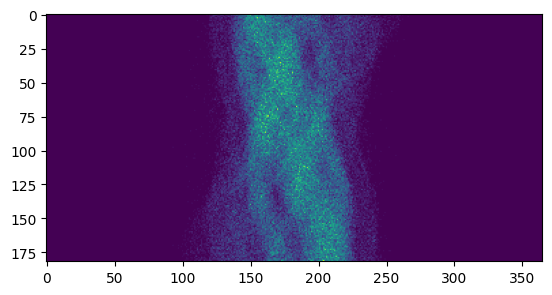

In [10]:
plt.imshow(sinogram[:, :, 34])

In [14]:
import torch

In [15]:
sinogram_randoms_estimate = gate.smooth_randoms_sinogram(torch.tensor(sinogram), info, sigma_r=.7, sigma_theta=.7, sigma_z=.7, kernel_size_r=5, kernel_size_theta=5, kernel_size_z=5)

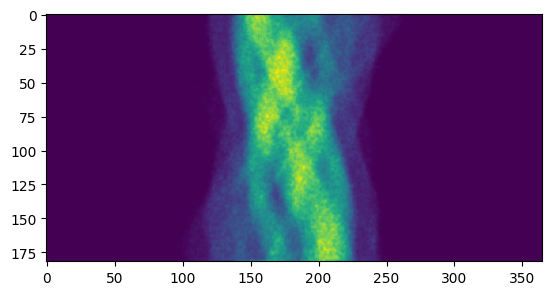

In [16]:
plt.imshow(sinogram_randoms_estimate[:, :, 34])